<a href="https://colab.research.google.com/github/moh-a-abde/moh-a-abde/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [18]:
# Testing
if __name__ == "__main__":
    # Imports
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA

    # Read in the preprocessed data file
    data = pd.read_csv('Sensor_Final_Pre.csv')

    # Split the data into X and Y
    X = data.drop(['label'], axis=1)  # X are the features
    y = data['label']                 # y is the label (what the model will be classifying)

    # Project the data onto the 2 primary principal components
    pca = PCA(9)
    pca.fit(X)
    X_projected = pca.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

Shape of X: (284557, 11)
Shape of transformed X: (284557, 9)


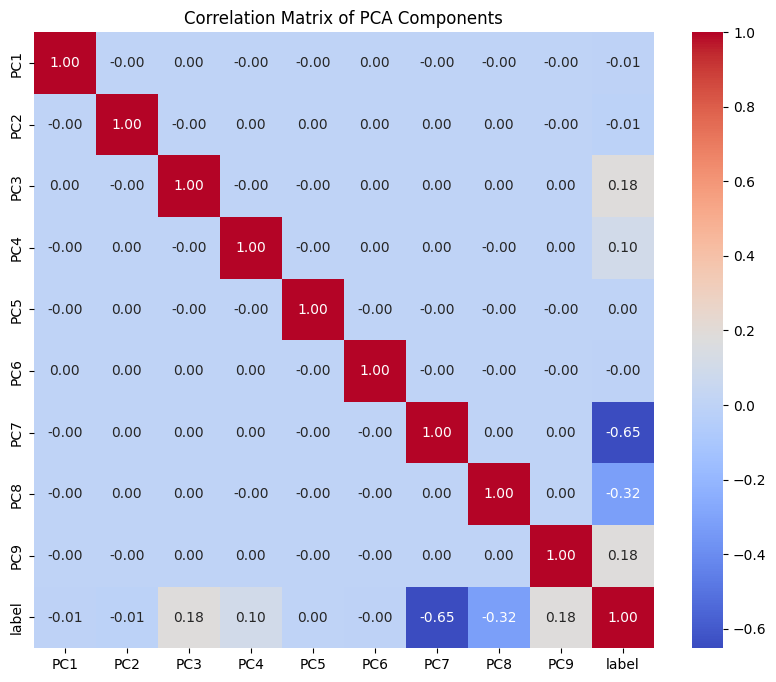

In [28]:
import seaborn as sns
# Convert PCA components to a DataFrame
pca_df = pd.DataFrame(X_projected, columns=[f'PC{i+1}' for i in range(9)])
pca_df['label'] = y
# Calculate correlation matrix
correlation_matrix = pca_df.corr()

    # Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of PCA Components')
plt.show()

Text(0.5, 1.0, 'Original Data (First 2 Features)')

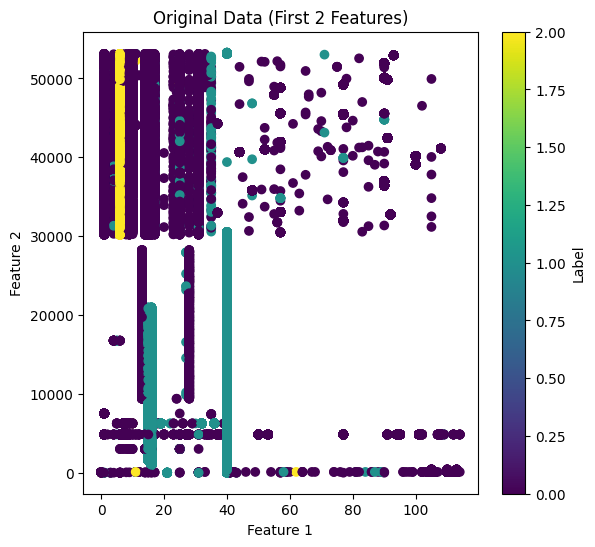

In [21]:
# Plot original data (for visualization, we'll use only first two features)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter, label='Label')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data (First 2 Features)')

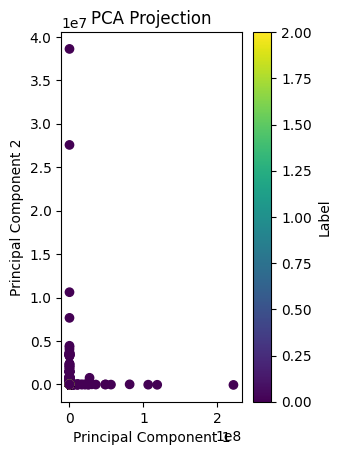

In [26]:

    # Plot the first two principal components
plt.subplot(1, 2, 2)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis')
plt.colorbar(scatter, label='Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')

plt.show()

In [29]:
# Save the new dataset to a CSV file
pca_df.to_csv('Sensor_Final_PCA.csv', index=False)